# Model `BinaryMFThresholdExCollective`

In [27]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import numpy as np
import time
import logging
import scipy.sparse

In [29]:
# generated dataset

# TODO

In [30]:
# real-world dataset

from datasets import MovieLensGenreCastUserData

data = MovieLensGenreCastUserData(size="1m")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

Xs = data.Xs

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (6040, 3706)
[I]   sampling to  : (300, 3706)
[I] Sampling axis 0 with given indices
[I]   sampling from: (6040, 82)
[I]   sampling to  : (300, 82)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 3706)
[I]   sampling to  : (300, 500)
[I] Sampling axis 1 with given indices
[I]   sampling from: (41, 3706)
[I]   sampling to  : (41, 500)
[I] Sampling axis 1 with given indices
[I]   sampling from: (9488, 3706)
[I]   sampling to  : (9488, 500)


In [31]:
# nagative sampling for all Xs
# only split the first X in Xs

from datasets import RatioSplit

s0 = RatioSplit(X=Xs[0], val_size=0.1, test_size=0.2, seed=1997)
s0.negative_sample(
    train_size=s0.pos_train_size, 
    val_size=s0.pos_val_size, 
    test_size=s0.pos_test_size, 
    seed=2023, type='popularity')

# s1 = RatioSplit(X=Xs[1], val_size=0.1, test_size=0.2, seed=1997)
# s1.negative_sample(
#     train_size=s1.pos_train_size, 
#     val_size=s1.pos_val_size, 
#     test_size=s1.pos_test_size, 
#     seed=2023, type='popularity')

# s2 = RatioSplit(X=Xs[2], val_size=0.1, test_size=0.2, seed=1997)
# s2.negative_sample(
#     train_size=s2.pos_train_size, 
#     val_size=s2.pos_val_size, 
#     test_size=s2.pos_test_size, 
#     seed=2023, type='popularity')

from datasets import NoSplit

s1 = NoSplit(X=Xs[1], seed=1997)
# s1.negative_sample(size=s1.pos_size, seed=2023, type='popularity')

s2 = NoSplit(X=Xs[2], seed=1997)
# s2.negative_sample(size=s2.pos_size, seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 5417
[I]   val_size     : 775
[I]   test_size    : 1549
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 142259
[I]   n_negatives  : 7741
[I]   train_size   : 5417
[I]   val_size     : 775
[I]   test_size    : 1549
[I]   seed         : 2023
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 1124
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1997
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 1200
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1997


In [32]:
Xs_train = [s0.X_train, s1.X_train, s2.X_train]
Xs_val = [s0.X_val, s1.X_val, s2.X_val]
Xs_test = [s0.X_test, s1.X_test, s2.X_test]

In [33]:
k = 5

factors = [[0, 1], [0, 2], [3, 1]]

# Init with `BinaryMFPenalty` (optional)

In [34]:
# from models import NMFSklearn, BinaryMFPenalty
# from utils import concat_Xs_into_X, split_U_into_Us, to_dense, get_factor_starts

# X_train = concat_Xs_into_X(Xs=Xs_train, factors=factors)

# model_nmf = NMFSklearn(k=k, init_method='nndsvd', seed=None)
# model_nmf.fit(X_train=X_train)

# model_bmf = BinaryMFPenalty(k=k, U=model_nmf.U, V=model_nmf.V, W='full', init_method='custom', seed=None)
# model_bmf.fit(X_train=X_train, task='reconstruction')

# U, V = to_dense(model_bmf.U), to_dense(model_bmf.V)

# factor_starts = get_factor_starts(Xs=Xs_train, factors=factors)
# Us = split_U_into_Us(U=U, V=V, factors=factors, factor_starts=factor_starts)

# `CMF`

[I] k            : 5
[I] alpha        : 3
[I] Us           : None
[I] Ws           : full
[I] link         : 3
[I] lr           : 0.1
[I] reg          : 0.1
[I] tol          : 0.0
[I] max_iter     : 50
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : prediction


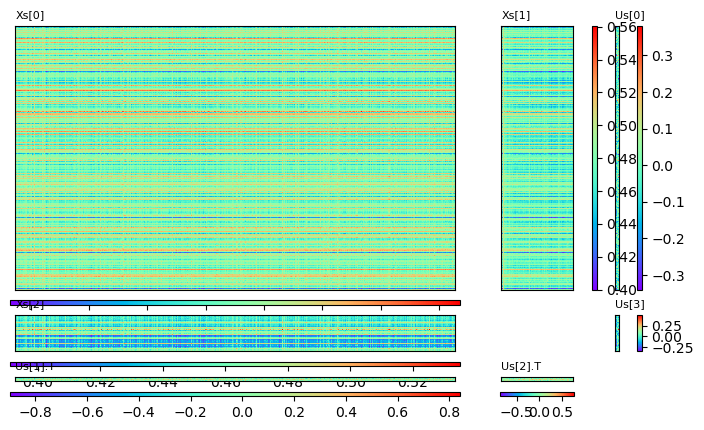

<Figure size 640x480 with 0 Axes>

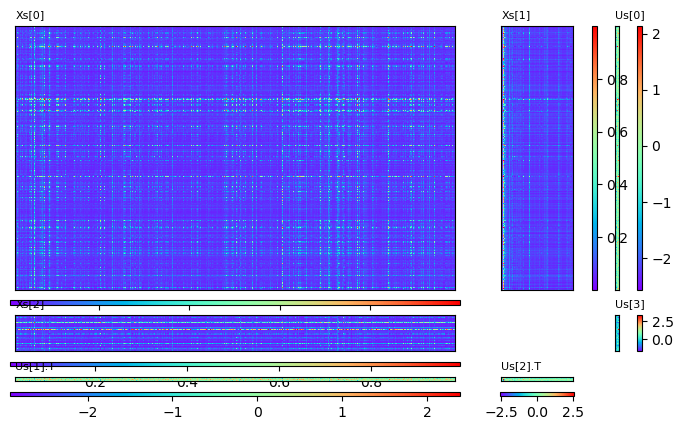

<Figure size 640x480 with 0 Axes>

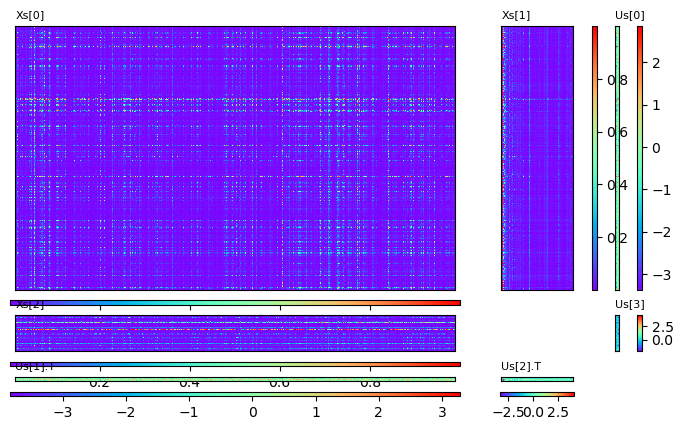

<Figure size 640x480 with 0 Axes>

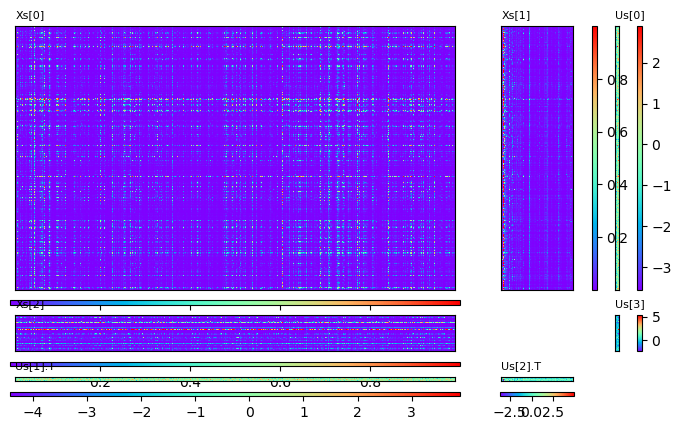

<Figure size 640x480 with 0 Axes>

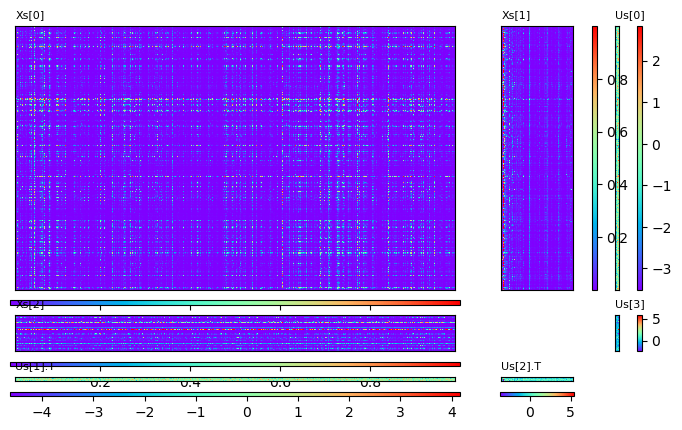

<Figure size 640x480 with 0 Axes>

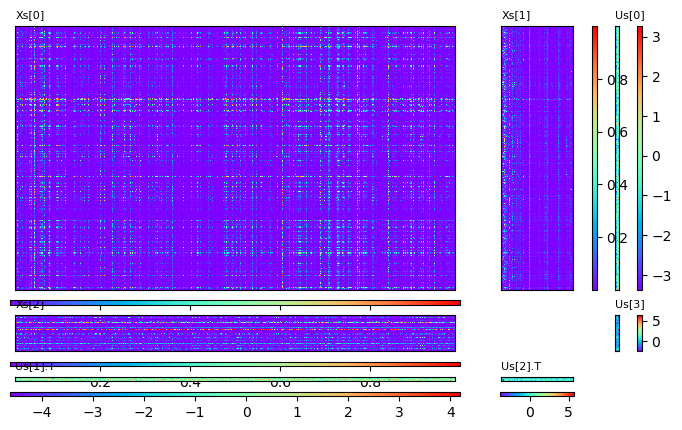

[W] Stopped in advance: Reach maximum iteration


<Figure size 640x480 with 0 Axes>

In [47]:
from models import CMF

k = 5
alpha = [0.33, 0.33, 0.33]
Ws = 'full'
link = ['logistic', 'logistic', 'logistic']
# link = ['linear', 'linear', 'linear']
lr = 0.1
reg = 0.1
tol = 0.0
max_iter = 50
init_method = 'normal'
seed = 2024

factors = [[0, 1], [0, 2], [3, 1]]

model_cmf = CMF(k=k, alpha=alpha, Ws=Ws, link=link, lr=lr, reg=reg, tol=tol, max_iter=max_iter, init_method=init_method, seed=seed)
model_cmf.fit(Xs_train=Xs_train, factors=factors, Xs_val=Xs_val, Xs_test=Xs_test, task='prediction', verbose=False, display=False)

# `BinaryMFThresholdExCollective`

In [55]:
from models import BinaryMFThresholdExCollective

us = [0.5, 0.5, 0.5, 0.5]

sigmoid_link = True
link_lamda = 10
columnwise = False
lamda = 10
lamda_rate = 1.0
min_diff = 1e-3
max_iter = 100

model = BinaryMFThresholdExCollective(k=k, Us=model_cmf.Us, us=us, alpha=alpha, Ws=Ws, sigmoid_link=sigmoid_link, link_lamda=link_lamda, columnwise=columnwise, lamda=lamda, lamda_rate=lamda_rate, min_diff=min_diff, max_iter=max_iter, seed=seed)
model.fit(Xs_train=Xs_train, factors=factors, Xs_val=Xs_val, Xs_test=Xs_test, task='reconstruction', verbose=True, display=False)

[I] k            : 5
[I] Us           : 4
[I] alpha        : 3
[I] Ws           : full
[I] us           : 4
[I] sigmoid_link : True
[I] link_lamda   : 10
[I] columnwise   : False
[I] lamda        : 10
[I] lamda_rate   : 1.0
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] iter: 0
[I] Wolfe line search for iter   : 0
    num of function evals made   : 53
    num of gradient evals made   : 2
    function value update        : 1261.334 -> 4941.545
    threshold update             :
        [0.50, 0.50, 0.50, 0.50]
     -> [0.50, 0.50, 0.50, 0.50]
    threshold update direction   :
        [-0.99, -0.12, -0.02, -0.02]
    threshold difference         : 0.000
None
[W] Stopped in advance: Difference lower than threshold


In [37]:
model.logs['updates']

\
                                                                                
                 time iter                                                 us   
0   25/05/24 09:55:34    0  [1.883836644321541, 1.9055662136731921, 0.6479...   
1   25/05/24 09:55:36    1  [0.8849499921974961, 1.9044695635980364, 0.600...   
2   25/05/24 09:55:37    2  [0.8693313092100172, 1.9044695615169471, 0.600...   
3   25/05/24 09:55:39    3  [0.8537125824865496, 1.9044695595483845, 0.599...   
4   25/05/24 09:55:40    4  [0.8380938128212808, 1.904469557676052, 0.5994...   
5   25/05/24 09:55:41    5  [0.8224750010008112, 1.9044695558860054, 0.599...   
6   25/05/24 09:55:42    6  [0.8146655744034286, 1.9044695550261586, 0.598...   
7   25/05/24 09:55:43    7  [0.8068561376168745, 1.9044695541819359, 0.598...   
8   25/05/24 09:55:44    8  [0.7990466907379885, 1.9044695533521576, 0.598...   
9   25/05/24 09:55:45    9  [0.7912372338635785, 1.9044695525357322, 0.598...   
10  25/05/24 09:55:46   10  [0.7873325004770415, 1.9044695521336907, 0.598...   
11  25/05/24 09:55:47   11  [0.7834277646350356, 1.9044695517345573, 0.597...   
12  25/05/24 09:55:48   12  [0.7795230263496874, 1.9044695513382195, 0.597...   
13  25/05/24 09:55:50   13  [0.7756182856331403, 1.904469550944569, 0.5977...   
14  25/05/24 09:55:51   14  [0.7717135424975575, 1.9044695505535019, 0.597...   
15  25/05/24 09:55:52   15  [0.7678087969551258, 1.9044695501649178, 0.597...   
16  25/05/24 09:55:53   16  [0.7639040490180585, 1.9044695497787205, 0.597...   
17  25/05/24 09:55:54   17  [0.7619516738583285, 1.904469549586769, 0.5973...   
18  25/05/24 09:55:55   18  [0.7599992981054221, 1.904469549395374, 0.5972...   
19  25/05/24 09:55:56   19  [0.7580469217608755, 1.9044695492045247, 0.597...   
20  25/05/24 09:55:57   20  [0.7560945448262276, 1.9044695490142103, 0.597...   
21  25/05/24 09:55:58   21  [0.7541421673030198, 1.9044695488244203, 0.597...   
22  25/05/24 09:56:00   22  [0.7521897891927959, 1.9044695486351444, 0.597...   
23  25/05/24 09:56:01   23  [0.750237410497103, 1.9044695484463725, 0.5970...   
24  25/05/24 09:56:02   24  [0.7482850312174909, 1.9044695482580947, 0.596...   
25  25/05/24 09:56:03   25  [0.7463326513555126, 1.904469548070301, 0.5969...   
26  25/05/24 09:56:04   26  [0.745356461134118, 1.9044695479766416, 0.5968...   

                 train                                          ...      test  \
                     0                             1            ...         2   
              F Recall Precision  Accuracy F1 Recall Precision  ...  Accuracy   
0   1261.609905    0.0         0  0.963887  0    0.0         0  ...  0.941463   
1   1261.605437    0.0         0  0.963887  0    0.0         0  ...  0.941463   
2   1261.604679    0.0         0  0.963887  0    0.0         0  ...  0.941463   
3   1261.603791    0.0         0  0.963887  0    0.0         0  ...  0.941463   
4   1261.602752    0.0         0  0.963887  0    0.0         0  ...  0.941463   
5   1261.601535    0.0         0  0.963887  0    0.0         0  ...  0.941463   
6   1261.600851    0.0         0  0.963887  0    0.0         0  ...  0.941463   
7   1261.600110    0.0         0  0.963887  0    0.0         0  ...  0.941463   
8   1261.599309    0.0         0  0.963887  0    0.0         0  ...  0.941463   
9   1261.598441    0.0         0  0.963887  0    0.0         0  ...  0.941463   
10  1261.597981    0.0         0  0.963887  0    0.0         0  ...  0.941463   
11  1261.597502    0.0         0  0.963887  0    0.0         0  ...  0.941463   
12  1261.597004    0.0         0  0.963887  0    0.0         0  ...  0.941463   
13  1261.596485    0.0         0  0.963887  0    0.0         0  ...  0.941463   
14  1261.595946    0.0         0  0.963887  0    0.0         0  ...  0.941463   
15  1261.595384    0.0         0  0.963887  0    0.0         0  ...  0.941463   
16  1261.594800    0.0         0  0.963887  0    0.0         0  ...  0.941463   
17  1261.594499    0.0      

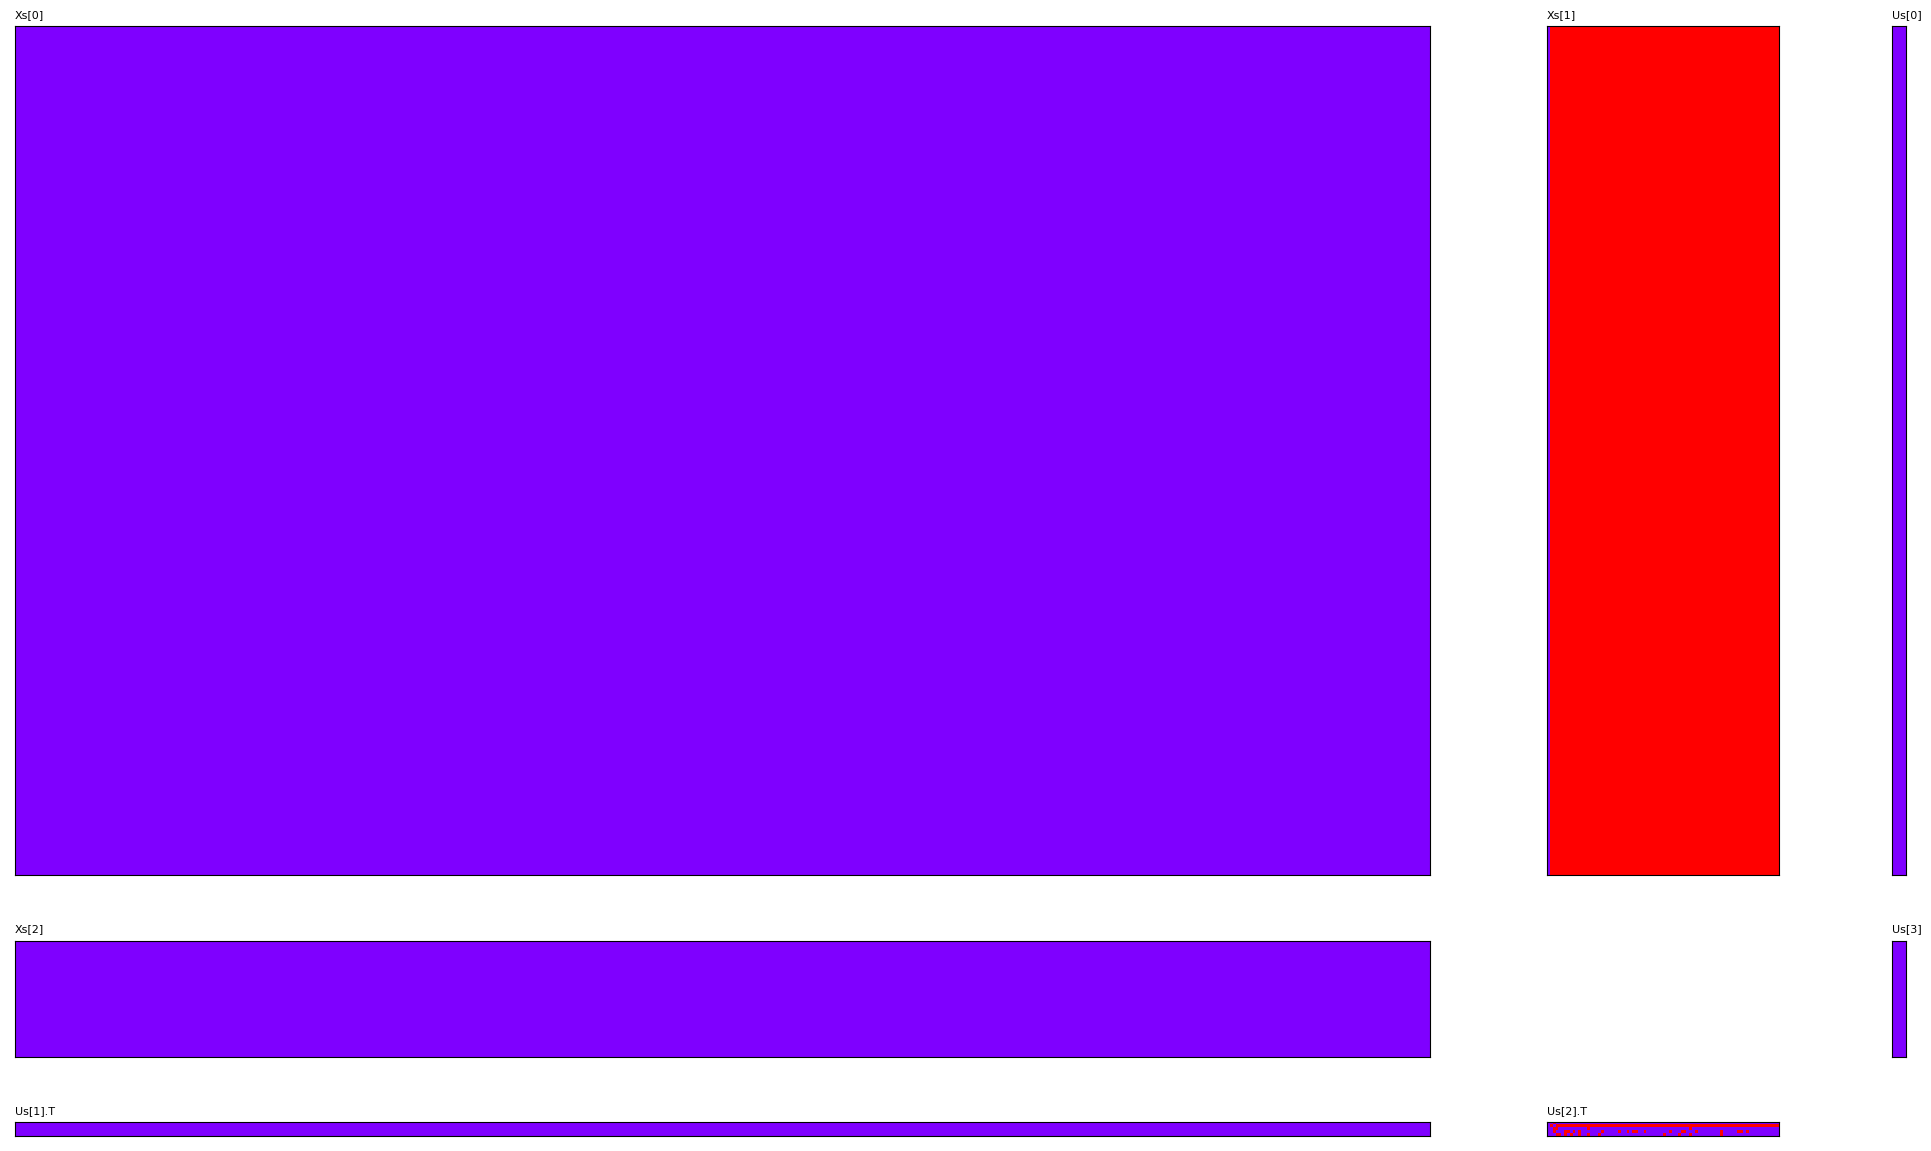

<Figure size 640x480 with 0 Axes>

In [56]:
from utils import show_matrix

# model.predict_Xs(us=[0, 0, 0, 0.25])
model.show_matrix(scaling=3)

# for i in range(model.n_matrices):


array([0.74535646, 1.90446955, 0.59688423, 0.79469237])